[Keras](https://keras.io/): a very, very high-level package for creating neural networks. As of 2017 or so, it has been integrated into Tensorflow (whereas before, it stood on top of either a Theano, Tensorflow, or CNTK backend -- these three packages are lower-level tools that can be used for building neural networks).

Keras is great because it lets you spin up all the popular neural network architectures in an almost criminally few lines of code, for instance, let's build a 10-way classifier that can classify hand-written numbers from 0-9.

<img src="https://i.stack.imgur.com/DlJ8J.png" width="60%"></img>

create NN architecture schematics here: http://alexlenail.me/NN-SVG/index.html

<br><br><br>
Python / notebook cheatsheet
* `Shift+Enter` to execute a given cell and move to / make a new next cell
* `#` is for single line comments
* each cell in this notebook can be either of type `code` (the cell below) or type `markdown` (this cell)
* tabs (indents) are required for any flow control (`for`, `if..else`, `while` etc)
* `=` is for assignment
* `()` is to call a function or method
* `[]` is for indexing into a variable
* a quick way to post-hoc to put parenthesis or brackets around something, just select that something and type `(` or `[`

In [1]:
# we can import the functions we need directly from tensorflow
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Activation, Dropout, Input
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.utils import to_categorical
from tensorflow.python.keras.initializers import RandomUniform, Zeros, Ones, glorot_uniform
from tensorflow.python.keras.regularizers import l1,l2

In [2]:
# or we can take them directly from keras itself
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Dropout, Input
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.initializers import RandomUniform, Zeros, Ones, glorot_uniform
from keras.regularizers import l1,l2

Using TensorFlow backend.


In [3]:
# more packages / functions that we'll need
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [4]:
# load and transform the data
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1]*x_train.shape[2]))
x_train = x_train/1. 
x_train_subset = x_train[:6000,:]
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1]*x_test.shape[2]))
x_test = x_test/1.
x_test_subset = x_test[:1000,:]
y_train = to_categorical(y_train)
y_train_subset = y_train[:6000]
y_test = to_categorical(y_test)
y_test_subset = y_test[:1000]

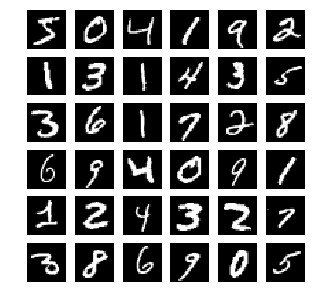

In [5]:
# visualize sample images from input dataset
figsize(5,5)
for a in range(0,36):
    plt.subplot(6,6,a+1)
    plt.imshow(np.reshape(x_train[a,:],(28,28)),cmap='gray')
    plt.axis('off')    

In [6]:
def makeNN(): # a function we can call to build our model
    myNN = Sequential() # instantiate a model
    myNN.add(Dense(64,activation='relu',kernel_initializer='random_uniform',input_shape=(x_train.shape[1],)))
    myNN.add(Dense(32,activation='relu',kernel_initializer='random_uniform'))
    myNN.add(Dense(10,activation='sigmoid',kernel_initializer='random_uniform'))
    myNN.compile(loss='categorical_crossentropy', metrics=['categorical_accuracy'],optimizer='SGD')
    return myNN

In [7]:
# make our model
myNN = makeNN() 

# train our model
history = myNN.fit(x=x_train_subset,y=y_train_subset,batch_size=1024,epochs=10,validation_data=(x_test_subset,y_test_subset))

Train on 6000 samples, validate on 1000 samples
Epoch 1/10
6000/6000 [==============================] - 2s 344us/step - loss: 2.2365 - categorical_accuracy: 0.1318 - val_loss: 2.0851 - val_categorical_accuracy: 0.2400
Epoch 2/10
6000/6000 [==============================] - 0s 14us/step - loss: 1.9046 - categorical_accuracy: 0.3443 - val_loss: 1.6642 - val_categorical_accuracy: 0.4760
Epoch 3/10
6000/6000 [==============================] - 0s 15us/step - loss: 1.8380 - categorical_accuracy: 0.4842 - val_loss: 1.5168 - val_categorical_accuracy: 0.6270
Epoch 4/10
6000/6000 [==============================] - 0s 13us/step - loss: 1.3848 - categorical_accuracy: 0.6330 - val_loss: 1.4245 - val_categorical_accuracy: 0.6270
Epoch 5/10
6000/6000 [==============================] - 0s 18us/step - loss: 1.2683 - categorical_accuracy: 0.6292 - val_loss: 1.0819 - val_categorical_accuracy: 0.7140
Epoch 6/10
6000/6000 [==============================] - 0s 14us/step - loss: 0.8443 - categorical_accuracy

Let's look at our model's performance over time

''

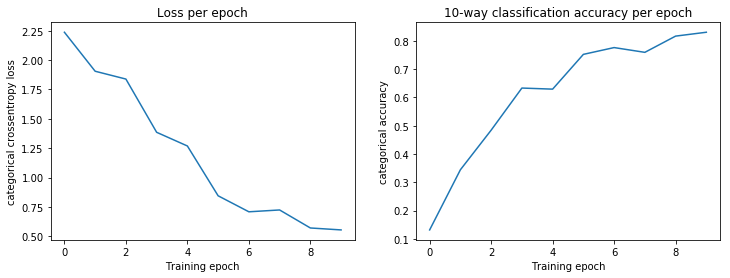

In [8]:
figsize(12,4)
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.title('Loss per epoch')
plt.xlabel('Training epoch')
plt.ylabel('categorical crossentropy loss')

plt.subplot(1,2,2)
plt.plot(history.history['categorical_accuracy'])
plt.title('10-way classification accuracy per epoch')
plt.xlabel('Training epoch')
plt.ylabel('categorical accuracy')
''''''

...and also visualize the model's decision boundary in 2D for any two given classes (i.e. numbers, like 1 vs 8)

Text(0.5, 1.0, 'red: 1, blue: 8     heatmap: P(digit = 8)')

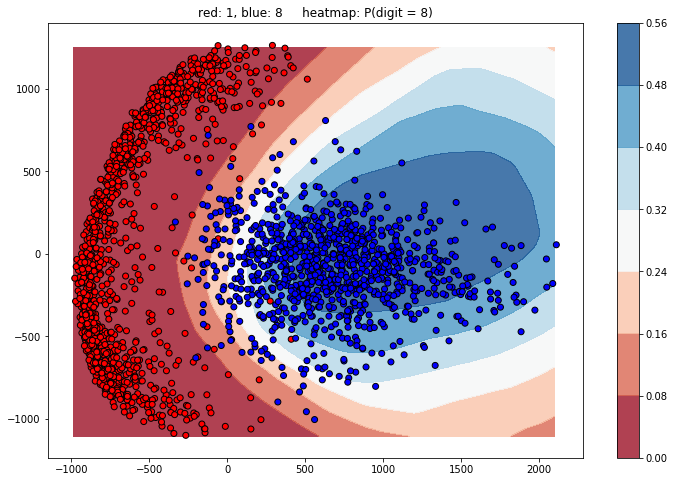

In [9]:
# visualize the decision boundary
# decision boundary visualization borrowed from: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
#############################################
# specify numbers to visualize
digitA = 1
digitB = 8
#############################################
figsize(12, 8)

# get test set data and labels from only these two numbers
x_test_2dig = np.c_[x_test[y_test[:,digitA].astype(bool),:].T,x_test[y_test[:,digitB].astype(bool),:].T].T
dig1_y = np.sum(y_test[:,digitA]==1)
dig2_y = np.sum(y_test[:,digitB]==1)
y_test_2dig = np.c_[np.zeros((1,dig1_y)),np.ones((1,dig2_y))]

# PCA-project into 2D
pca = PCA(n_components=2)
Xtransformed = pca.fit_transform(x_test_2dig)

# colormap settings
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

hx = 20  # xstep size in the mesh
hy = 20 # ystep size in the mesh
x_min, x_max = Xtransformed[:, 0].min() - 5, Xtransformed[:, 0].max() + 5
y_min, y_max = Xtransformed[:, 1].min() - 5, Xtransformed[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx),np.arange(y_min, y_max, hy))

# convert the meshgrid points to original datapoints so we can get the prediction probabilities from our model
XXYYpts = pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
Z = myNN.predict(XXYYpts)
Z = np.c_[Z[:,digitA],Z[:,digitB]]
Z = Z.reshape(xx.shape[0],xx.shape[1],2)

# Put the prediction probability map
plt.contourf(xx, yy, np.squeeze(Z[:,:,1]), cmap=cm, alpha=.8)
plt.colorbar()

# Plot the original data
plt.scatter(Xtransformed[:, 0], Xtransformed[:, 1], c=y_test_2dig.ravel(), cmap=cm_bright, edgecolors='k')
plt.title('red: ' + str(digitA) + ', ' + 'blue: ' + str(digitB) + '     heatmap: P(digit = ' + str(digitB) + ')')

In 7 lines of code, 
* we made a 'multi-layer perceptron' neural network in Keras to classify hand-written digits
* we trained it
* and it has amazingly good accuracy!

But how did we do this? What did all that code mean??

Let's unpack this exercise starting from the top of the notebook (using Google, whiteboard, etc as needed)

Your task: annotate this notebook with notes based upon discussion below, then try to get maximum accuracy and minimum loss on the full test set

Data processing and model-building steps
* load data
    * vectorize data
    * rescale data: not entirely necessary; but do need conversion to `float` from `int`
    * one-hot encode the data labels
* build the model
    * add a layer with n units: you choose!
    * initialize weights: can't do 0 weights! can't do the same weights!
    * specify activation function: some work better than others, given gradient descent!
    * (not shown: add regularization via dropout `Dropout(..)` or L1/L2, `kernel_regularizer=l1(0.001)`)
    * repeat for next layers
    * add a final layer of 10 units to get predictions
* compile the model
    * specify loss function: https://keras.io/losses/
    * specify how to apply the loss function: learning rates, learning rate decay, momentum
    * specify evaluation metric(s): model doesn't care about these metrics!
* implementation notes? questions?
    * every time you run `fit()`, model will continue from where it left off

Useful ways to visualize or use model below

In [10]:
result = myNN.predict(x_test, batch_size=64) # make predictions
performance = myNN.evaluate(x_test,y_test,batch_size=64) # get loss and metrics

10000/10000 [==============================] - 0s 32us/step


In [11]:
result.shape

(10000, 10)

In [12]:
performance

[0.5420892810821534, 0.8284]

In [13]:
myNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [14]:
myNN.layers

In [15]:
myNN.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'RandomUniform',
     'config': {'minval': -0.05, 'maxval': 0.05, 'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_2',
    'trainable': True,
    'units': 32,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'RandomUniform',
     'config': {'minval': -0.05, 'maxval': 0.05, 'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_reg

The 'functional' API in Keras: an alternative way of specifying models with layers that take each other as arguments

In [16]:
Xin = Input(shape=(784,))
X = Dense(128)(Xin)
X = Dense(128)(X)
Xout = Dense(10,activation='softmax')(X)
myclassifier = Model(inputs=Xin,outputs=Xout)
# then do myclassifier.compile, .fit, etc